In [1]:
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt
%matplotlib inline

## 問題1

In [2]:
# dataset 4
n = 200
x_d4 = 3 * (np.random.rand(n, 4) - 0.5)
y_d4 = (2 * x_d4[:, 0] - 1 * x_d4[:,1] + 0.5 + 0.5 * np.random.randn(n)) > 0
y_d4 = 2 * y_d4 -1
lam = 0.01
w = np.random.rand(4) - 0.5

In [3]:
def function(w):
    return np.array([1 if np.dot(x_d4[i], w) > 0 else -1 for i in range(200)])

def loss_J(w):
    return np.sum([np.log(1+np.exp(-y_d4[i]*np.dot(x_d4[i], w))) for i in range(200)]) + lam*np.dot(w, w)

def gradient_J(w):
    return np.sum([(np.exp(-y_d4[i]*np.dot(x_d4[i], w))*(-y_d4[i]*x_d4[i])) / (1+np.exp(-y_d4[i]*np.dot(x_d4[i], w))) for i in range(200)]) + 2*lam*w

def double_gradient_J(w):
    matrix_i = np.zeros([4,4])
    for i in range(200):
        matrix_i = matrix_i + ((np.exp(-y_d4[i]*np.dot(x_d4[i], w))/(1+np.exp(-y_d4[i]*np.dot(x_d4[i], w))))*np.multiply([list(x) for x in list(zip(x_d4[i]))], x_d4[i]))
    return matrix_i + 2*lam*np.eye(4)

In [4]:
def count_pattern(w):
    f = function(w)
    print("[1, 1]: "+str(sum([1 if y_d4[i] == 1 and f[i] == 1 else 0 for i in range(200)])))
    print("[1, -1]: "+str(sum([1 if y_d4[i] == 1 and f[i] == -1 else 0 for i in range(200)])))
    print("[-1, 1]: "+str(sum([1 if y_d4[i] == -1 and f[i] == 1 else 0 for i in range(200)])))
    print("[-1, -1]: "+str(sum([1 if y_d4[i] == -1 and f[i] == -1 else 0 for i in range(200)])))

In [5]:
count_pattern(w)

[1, 1]: 52
[1, -1]: 66
[-1, 1]: 52
[-1, -1]: 30


### 1-1:最急降下法

In [13]:
alpha = 1e-6
iteration_max = 1000
w_sgd_hist = []
loss_hist_sgd = []
sgd_w = w

for i in range(iteration_max):
    w_sgd_hist.append(sgd_w)
    loss_hist_sgd.append(loss_J(sgd_w))
    if i % 100 == 0:
        print("iteration "+str(i)+" loss: "+str(loss_J(sgd_w)))
        
    sgd_w_min = sgd_w - alpha * gradient_J(w)
    
    if np.linalg.norm(sgd_w_min - sgd_w, ord=1) < alpha:
        sgd_w = sgd_w_min
        break
    
    sgd_w = sgd_w_min

w_sgd_hist.append(sgd_w)
loss_hist_sgd.append(loss_J(sgd_w))

print("optimization w : "+str(sgd_w))

iteration 0 loss: 149.115223856
iteration 100 loss: 149.06277059
iteration 200 loss: 149.011109212
iteration 300 loss: 148.96023876
iteration 400 loss: 148.910158257
iteration 500 loss: 148.860866715
iteration 600 loss: 148.81236313
iteration 700 loss: 148.764646487
iteration 800 loss: 148.717715758
iteration 900 loss: 148.671569901
optimization w : [-0.03164828  0.19768596  0.20603735  0.28036929]


In [14]:
count_pattern(sgd_w)

[1, 1]: 55
[1, -1]: 63
[-1, 1]: 47
[-1, -1]: 35


### 1-2 Newton法

In [15]:
w_newton = w
w_newton_hist = []
loss_hist_newton = []
for i in range(1000):
    w_newton_hist.append(w_newton)
    loss_hist_newton.append(loss_J(w_newton))
    if i % 100 == 0:
        print("iteration "+str(i)+" loss: "+str(loss_J(w_newton)))
    w_delta = np.linalg.solve(double_gradient_J(w_newton), -gradient_J(w_newton))
    w_newton = w_newton + w_delta

    if np.linalg.norm(w_delta) < 1e-10:
        break

w_newton_hist.append(w_newton)
loss_hist_newton.append(loss_J(w_newton))

iteration 0 loss: 149.115223856
iteration 100 loss: 161.047032587
iteration 200 loss: 160.401322314
iteration 300 loss: 159.768835155
iteration 400 loss: 159.149342162
iteration 500 loss: 158.542619284
iteration 600 loss: 157.948445056
iteration 700 loss: 157.3666006
iteration 800 loss: 156.796869621
iteration 900 loss: 156.239038398


In [16]:
loss_min = min(loss_hist_newton)
w_newton_min = w_newton_hist[np.argmin(loss_hist_newton)]
        
print("optimization w: "+str(w_newton_min))
w_newton = w_newton_min

optimization w: [ 0.27302821  0.45409448  0.48684547  0.56285119]


In [17]:
count_pattern(w_newton)

[1, 1]: 67
[1, -1]: 51
[-1, 1]: 40
[-1, -1]: 42


### 1-3 loss plot

In [18]:
x = range(0, 1001, 100)
y_sgd = [loss - min(loss_hist_sgd) for i, loss in enumerate(loss_hist_sgd) if i % 100 == 0]
y_newton = [loss - min(loss_hist_newton) for i, loss in enumerate(loss_hist_newton) if i % 100 == 0]

In [19]:
len(x), len(y_sgd), len(y_newton)

(11, 11, 11)

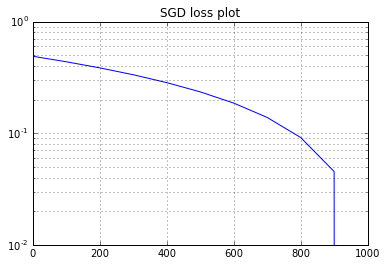

In [20]:
plt.plot(x, y_sgd)
ax = plt.gca()
ax.set_yscale('log')
plt.title("SGD loss plot")
plt.grid(which="both")
plt.show()

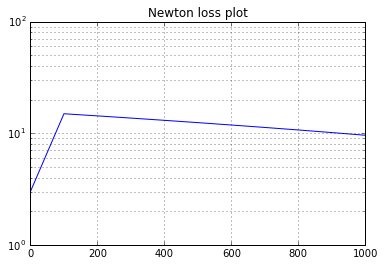

In [21]:
plt.plot(x, y_newton)
ax = plt.gca()
ax.set_yscale('log')
plt.title("Newton loss plot")
plt.grid(which="both")
plt.show()

### 1-4 Multiclass version

In [22]:
# dataset 5
n = 200
x_d5 = 3 * (np.random.rand(n, 4) - 0.5)
W = np.array([[ 2,  -1, 0.5,],
              [-3,   2,   1,],
              [ 1,   2,   3]])
y_d5 = np.argmax(np.dot(np.hstack([x_d5[:,:2], np.ones((n, 1))]), W.T)
                        + 0.5 * np.random.randn(n, 3), axis=1)
w = np.random.rand(4) - 0.5

In [23]:
def loss_J_d5(w):
    return np.sum([np.log(1+np.exp(-y_d5[i]*np.dot(x_d5[i], w))) for i in range(200)]) + lam*np.dot(w, w)

def gradient_J_d5(w):
    return np.sum([(np.exp(-y_d5[i]*np.dot(x_d5[i], w))*(-y_d5[i]*x_d5[i])) / (1+np.exp(-y_d5[i]*np.dot(x_d5[i], w))) for i in range(200)]) + 2*lam*w

def double_gradient_J_d5(w):
    matrix_i = np.zeros([4,4])
    for i in range(200):
        matrix_i = matrix_i + ((np.exp(-y_d5[i]*np.dot(x_d5[i], w))/(1+np.exp(-y_d5[i]*np.dot(x_d5[i], w))))*np.multiply([list(x) for x in list(zip(x_d5[i]))], x_d5[i]))
    return matrix_i + 2*lam*np.eye(4)

#### SGD

In [24]:
alpha = 1e-6
iteration_max = 1000
w_sgd_hist = []
loss_hist_sgd = []
sgd_w = w

for i in range(iteration_max):
    w_sgd_hist.append(sgd_w)
    loss_hist_sgd.append(loss_J(sgd_w))
    if i % 100 == 0:
        print("iteration "+str(i)+" loss: "+str(loss_J(sgd_w)))
        
    sgd_w_min = sgd_w - alpha * gradient_J(w)
    
    if np.linalg.norm(sgd_w_min - sgd_w, ord=1) < alpha:
        sgd_w = sgd_w_min
        break
    
    sgd_w = sgd_w_min

w_sgd_hist.append(sgd_w)
loss_hist_sgd.append(loss_J(sgd_w))

print("optimization w : "+str(sgd_w))

iteration 0 loss: 151.241720937
iteration 100 loss: 150.771771483
iteration 200 loss: 150.308651945
iteration 300 loss: 149.852389619
iteration 400 loss: 149.403010848
iteration 500 loss: 148.960541008
iteration 600 loss: 148.525004475
iteration 700 loss: 148.09642461
iteration 800 loss: 147.674823732
iteration 900 loss: 147.260223099
optimization w : [-0.11566359 -0.17510748 -0.39152564  0.29113726]


#### Newton 法

In [25]:
w_newton = w
w_newton_hist = []
loss_hist_newton = []
for i in range(1000):
    w_newton_hist.append(w_newton)
    loss_hist_newton.append(loss_J(w_newton))
    if i % 100 == 0:
        print("iteration "+str(i)+" loss: "+str(loss_J(w_newton)))
    w_delta = np.linalg.solve(double_gradient_J(w_newton), -gradient_J(w_newton))
    w_newton = w_newton + w_delta

    if np.linalg.norm(w_delta) < 1e-10:
        break

w_newton_hist.append(w_newton)
loss_hist_newton.append(loss_J(w_newton))

iteration 0 loss: 151.241720937
iteration 100 loss: 185.909578575
iteration 200 loss: 184.790734777
iteration 300 loss: 183.692356267
iteration 400 loss: 182.614141013
iteration 500 loss: 181.555790444
iteration 600 loss: 180.517009388
iteration 700 loss: 179.497506012
iteration 800 loss: 178.496991763
iteration 900 loss: 177.515181315


## 問題2

### 2-1

In [26]:
A = np.array([[3, 0.5], [0.5, 1]])
mu = np.array([1, 2])
gamma = 1/max(np.linalg.eig(2*A)[0])

In [27]:
def proximal_gradient(grad_f, prox, gamma, objective, w_init, tol=1e-9):
    w = w_init
    result = objective(w)
    w_hist = []
    while True:
        w_hist.append(w)
        w_new = prox(w - gamma * grad_f(w), gamma)
        result_new = objective(w_new)
        if (np.abs(result - result_new)/np.abs(result) < tol):
            w = w_new
            break;
        w = w_new
        result = result_new
    w_hist.append(w)
    
    return w, result_new, w_hist

def prox_norm1(v, gamma, lam):
    return soft_thresh(v, lam * gamma)

def soft_thresh(b, lam):
    x_hat = np.zeros(b.shape[0])
    x_hat[b >= lam] = b[b >= lam] - lam
    x_hat[b <= -lam] = b[b <= -lam] + lam
    return x_hat

def ISTA(A, mu, lam, gamma):
    objective = lambda x:np.dot((x-mu), np.dot(A, (x-mu))) + lam * np.sum(np.abs(x))
    grad_f = lambda x: np.dot((A.T+A), (x-mu))
    prox = lambda v, gamma:prox_norm1(v, gamma, lam)
    w_init = np.random.randn(A.shape[1])
    (w_hat, result, w_hist) = proximal_gradient(grad_f=grad_f, prox=prox, gamma=gamma, objective=objective, w_init=w_init)
    return w_hat, result, w_hist

[ 0.81816858  1.09096516]


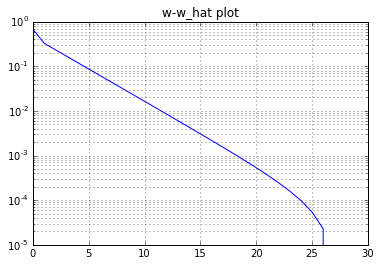

[ 0.63638081  0.18174542]


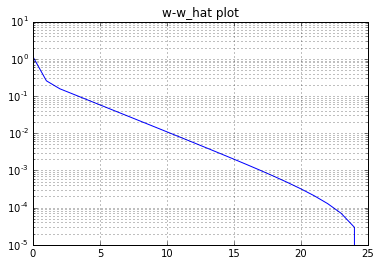

[ 0.33333189  0.        ]


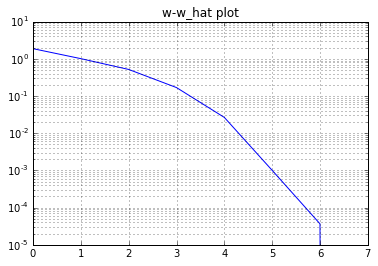

In [28]:
for lam in range(2, 7, 2):
    w_hat, result, w_hist = ISTA(A, mu, lam, gamma)
    w_hist = np.array(w_hist)
    print(w_hat)
    plt.plot([np.linalg.norm(hist-w_hat) for hist in w_hist])   
    ax = plt.gca()
    ax.set_yscale('log')
    plt.title("w-w_hat plot")
    plt.grid(which="both")
    plt.show()

### 2-2

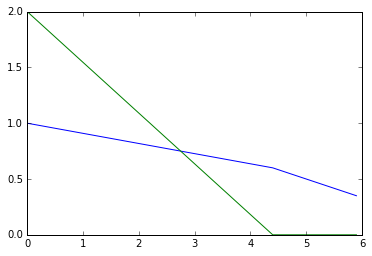

In [29]:
w_hat_lam = []
lams = np.arange(0, 6, 0.1)

for lam in lams:
### implement PG ###
    w_hat, result, w_hist = ISTA(A, mu, lam, gamma)
    w_hat_lam.append(w_hat)
###
w_hat_lam = np.array(w_hat_lam)
plt.plot(lams, w_hat_lam.T[0], label="w1")
plt.plot(lams, w_hat_lam.T[1], label="w2")
plt.show()

### 2-3

In [83]:
def proximal_gradient(grad_f, prox, gamma, objective, w_init, tol=1e-9):
    w = w_init
    result = objective(w)
    for i in range(1000):
        w_new = prox(w - gamma * grad_f(w), gamma)
        result_new = objective(w_new)
        if (np.abs(result - result_new)/np.abs(result) < tol):
            break;
        w = w_new
        result = result_new
    return w_new, result_new

def prox_group_norm(v, gamma, lam, groups):
    u = np.zeros(v.shape[0])
    for i in range(0, max(groups)+1):
        u[groups == i] = block_soft_thresh(v[groups == i] , gamma * lam)
    return np.array([u]).T

def block_soft_thresh(b, lam):
    return max(0, 1 - lam/np.linalg.norm(b)) * b

def group_ISTA(X, y, w_init, lam, gamma, groups):
    objective = lambda w:np.sum(np.power(y - np.dot(X, w), 2))/2.0 + lam * np.sum(np.abs(w))
    grad_f = lambda w: np.dot(X.T, np.dot(X, w) - y)
    prox = lambda v, gamma:prox_group_norm(v, gamma, lam, groups)
    (w_hat, result) = proximal_gradient(grad_f, prox, gamma, objective, w_init)
    return w_hat, result

In [92]:
# dataset 6
d_d6 = 200
n_d6 = 180

# we consider 5 groups where each group has 40 attributes
groupSize = 5
attrSize = 40
g_d6 = np.arange(groupSize*attrSize).reshape(groupSize,-1)

x_d6 = np.random.randn(n_d6, d_d6)
noise_d6 = 0.5

# we consider feature in group 1 and group 2 is activated.
w_d6 = np.vstack([20 * np.random.randn(80, 1),
                 np.zeros((120, 1)),
                 5 * np.random.rand()])
x_d6_tilde = np.hstack([x_d6, np.ones((n_d6, 1))])
y_d6 = np.dot(x_d6_tilde, w_d6) + noise_d6 * np.random.randn(n_d6, 1)

In [93]:
g_d6 = np.arange(groupSize*attrSize) // 40

w_hat, result = group_ISTA(X=x_d6_tilde, y = y_d6, w_init=w_d6, lam=0.2, gamma=gamma, groups=g_d6)

/Users/irokawa/.pyenv/versions/Anaconda3-4.0.0/lib/python3.5/site-packages/ipykernel/__main__.py:16: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 201 but corresponding boolean dimension is 200
/Users/irokawa/.pyenv/versions/Anaconda3-4.0.0/lib/python3.5/site-packages/ipykernel/__main__.py:16: DeprecationWarning: assignment will raise an error in the future, most likely because your index result shape does not match the value array shape. You can use `arr.flat[index] = values` to keep the old behaviour.


In [94]:
w_hat

array([[ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ n

## 問題5

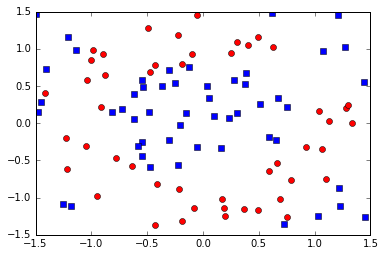

In [36]:
# dataset 1
np.random.seed(123)
n = 100
x_d1 = 3 * (np.random.rand(n, 2)-0.5)
radius = x_d1[:,0]**2 + x_d1[:,1]**2
y_d1 = (radius > 0.7 + 0.1 * np.random.randn(n)) &( radius < 2.2 + 0.1 * np.random.randn(n))
y_d1 = 2 * y_d1 -1

plt.plot(x_d1[y_d1 < 0, 0],  x_d1[y_d1 < 0, 1], 'bs')
plt.plot(x_d1[y_d1 > 0, 0],  x_d1[y_d1 > 0, 1], 'ro')

In [38]:
y_d1

array([ 1, -1, -1, -1, -1,  1,  1, -1,  1, -1,  1, -1,  1,  1, -1,  1, -1,
       -1,  1,  1,  1, -1,  1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1,
        1, -1, -1, -1,  1,  1, -1, -1, -1,  1, -1, -1,  1, -1,  1,  1, -1,
       -1, -1,  1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1,
        1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,
        1, -1, -1, -1, -1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1])